# Exercício 01

Considere uma faixa retangular de medidas $L = 8$ e $W = 6$, e os polígonos dados pelos vértices:
$$
Q = \begin{bmatrix} (10, 0), (15, 0), (15, 5), (10, 5) \end{bmatrix},
$$
e
$$
T = \begin{bmatrix} (10, 6), (12, 6), (12, 8) \end{bmatrix}.
$$

Considere o problema de dimensionar os polígonos dentro da faixa retangular sem que haja sobreposição.

In [11]:
# Pacotes e funções úteis:

using LinearAlgebra, JuMP, Ipopt

include("./desenha.jl")

plota_solucao_cp

### a) Desenhe o problema.

In [13]:
lista_circulos = []
centro_circulos = [[]]
lista_poligonos = [
                    [10.0  0.0;  15.0  0.0;  15.0  5.0;  10.0  5.0],
                    [10.0  6.0;  12.0  6.0;  12.0  8.0]
                    ]
L = 8.0
W = 6.0
lista_poligonos
plota_problema(centro_circulos, lista_circulos, lista_poligonos, L, W)
println(size(lista_poligonos[1])[1])

4


### b) Modele e resolva o problema indicado conforme Peralta, Andretta e Oliveira.

In [15]:
n = size(lista_poligonos[1])[1]
P_refe = zeros(n, 2)
for i=1:n
    P_refe[i, :] =(lista_poligonos[1])[i, :] - (lista_poligonos[1])[1, :]
end

reta = P_refe[1:2, :];
show(P_refe)
show(reta)

n_2  = size(lista_poligonos[2])[1]
P_refe_2 = zeros(n_2, 2)
 for i = 1:n_2
     P_refe_2[i, :] = (lista_poligonos[2])[i, :] - (lista_poligonos[2])[1, :]
 end
show(P_refe_2)


#Modelo Criado
model = Model(Ipopt.Optimizer)
@variable(model, xP[1:2])
@variable(model, yP[1:2])
@variable(model, theta_P[1:2])
@variable(model, xL)
@variable(model, yL)
@variable(model, alpha_L)
@NLexpression(model, NLe1[i=1:n], 
    P_refe[i, 1] * cos(theta_P[1]) - P_refe[i, 2] * sin(theta_P[1]) + xP[1])
@NLexpression(model, NLe2[i=1:n], 
    P_refe[i, 1] * sin(theta_P[1]) + P_refe[i, 2] * cos(theta_P[1]) + yP[1])
@NLconstraint(model, [i=1:n], 0.0 <= NLe1[i] <= W )
@NLconstraint(model, [i=1:n], 0.0 <= NLe2[i] <= L )
@NLexpression(model, NLe3[j=1:n_2], 
    P_refe_2[j, 1] * cos(theta_P[2]) - P_refe_2[j, 2] * sin(theta_P[2]) + xP[2])
@NLexpression(model, NLe4[j=1:n_2], 
    P_refe_2[j, 1] * sin(theta_P[2]) + P_refe_2[j, 2] * cos(theta_P[2]) + yP[2])
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe3[j] <= W )
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe4[j] <= L )
@NLexpression(model, cij, 
    ((reta[2, 1] - reta[1, 1]) * sin(alpha_L) + (reta[2, 2] - reta[1, 2]) * cos(alpha_L)) /
    ((reta[2, 1] - reta[1, 1]) * cos(alpha_L) + (reta[1, 2] - reta[2, 2]) * sin(alpha_L)) )
@NLexpression(model, dij, yL - cij * xL)
@NLconstraint(model, [i=1:n], NLe2[i] - cij * NLe1[i] - dij <= 0.0)
@NLconstraint(model, [j=1:n_2], NLe4[j] - cij * NLe3[j] - dij >= 0.0)
@objective(model, Min, 0)

# Chama o otimizador Ipopt:
status = optimize!(model)


[0.0 0.0; 5.0 0.0; 5.0 5.0; 0.0 5.0][0.0 0.0; 5.0 0.0][0.0 0.0; 2.0 0.0; 2.0 2.0]This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       70
Number of nonzeros in Lagrangian Hessian.............:       70

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       21
        inequality constraints with only lower bounds:        3
   inequality constraints with lower and upper bounds:       14
        inequality constraints with only upper bounds:        4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  

In [17]:
print(model)

### c) Desenhe a solução encontrada.

In [19]:
x= [value.(xP)[1], value.(yP)[1], value.(theta_P)[1],value.(xP)[2], value.(yP)[2], value.(theta_P)[2]]

6-element Vector{Float64}:
  0.5087145792436778
  0.38207213634577875
  0.005604762920340481
  1.733347792394532
  7.512522385110592
 -0.7821410914232321

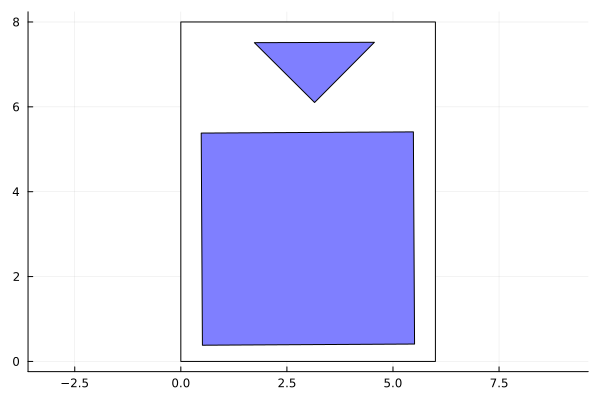

In [21]:
lista_poligonos = [
                    [0.0, 0.0,  5.0,  0.0,  5.0,  5.0,  0.0,  5.0],
                    [0.0,  0.0, 2.0,  0.0, 2.0,  2.0]
                    ]

using Plots

plota_solucao(lista_circulos, lista_poligonos,L, W,x)
 


### d) Desenhe, modele e resolva o problema através da triangularização dos quadrados. 

In [23]:
lista_circulos = []
centro_circulos = [[]]
lista_poligonos = [[[10.0  0.0; 15.0  0.0;15.0  5.0],[10.0  0.0;  15.0  5.0;  10.0  5.0]],[10.0 6.0;12.0  6.0;12.0 8.0]]
L = 8.0
W = 6.0

#plota_problema_cp(centro_circulos, lista_circulos, lista_poligonos, L, W)

n = size(lista_poligonos[1][1])[1]
P_refe = zeros(n, 2) 
 for i=1:n
    P_refe[i, :] =(lista_poligonos[1][1])[i, :] - (lista_poligonos[1][1])[1, :]
 end

reta_1 = P_refe[1:2, :]
n_2 = size(lista_poligonos[1][2])[1]
P_refe_2 = zeros(n, 2) 
 for i=1:n_2
    P_refe_2[i, :] =(lista_poligonos[1][2])[i, :] - (lista_poligonos[1][2])[1, :]
 end

reta_2 = P_refe_2[1:2, :]


show(P_refe)
show(reta)

n_3  = size(lista_poligonos[2])[1]
P_refe_3 = zeros(n_3, 2)
 for i = 1:n_3
    P_refe_2[i, :] = (lista_poligonos[2])[i, :] - (lista_poligonos[2])[1, :]
  end
show(P_refe_2)

#Modelo Criado
model = Model(Ipopt.Optimizer)
@variable(model, xP[1:2])
@variable(model, yP[1:2])
@variable(model, theta_P[1:2])
@variable(model, xL)
@variable(model, yL)
@variable(model, alpha_L)
@NLexpression(model, NLe1[i=1:n], 
    P_refe[i, 1] * cos(theta_P[1]) - P_refe[i, 2] * sin(theta_P[1]) + xP[1])
@NLexpression(model, NLe2[i=1:n], 
    P_refe[i, 1] * sin(theta_P[1]) + P_refe[i, 2] * cos(theta_P[1]) + yP[1])
@NLconstraint(model, [i=1:n], 0.0 <= NLe1[i] <= W )
@NLconstraint(model, [i=1:n], 0.0 <= NLe2[i] <= L )


@NLexpression(model, NLe3[j=1:n_2], 
    P_refe_2[j, 1] * cos(theta_P[2]) - P_refe_2[j, 2] * sin(theta_P[2]) + xP[2])
@NLexpression(model, NLe4[j=1:n_2], 
    P_refe_2[j, 1] * sin(theta_P[2]) + P_refe_2[j, 2] * cos(theta_P[2]) + yP[2])
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe3[j] <= W )
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe4[j] <= L )
@NLexpression(model, NLe5[j=1:n_2], 
    P_refe_3[j, 1] * cos(theta_P[2]) - P_refe_3[j, 2] * sin(theta_P[2]) + xP[2])
@NLexpression(model, NLe6[j=1:n_2], 
    P_refe_3[j, 1] * sin(theta_P[2]) + P_refe_3[j, 2] * cos(theta_P[2]) + yP[2])
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe5[j] <= W )
@NLconstraint(model, [j=1:n_2], 0.0 <= NLe6[j] <= L )

@NLexpression(model, cij, 
    ((reta[2, 1] - reta[1, 1]) * sin(alpha_L) + (reta[2, 2] - reta[1, 2]) * cos(alpha_L)) /
    ((reta[2, 1] - reta[1, 1]) * cos(alpha_L) + (reta[1, 2] - reta[2, 2]) * sin(alpha_L)) )
@NLexpression(model, dij, yL - cij * xL)


@NLexpression(model, cij_2, 
    ((reta_2[2, 1] - reta_2[1, 1]) * sin(alpha_L) + (reta_2[2, 2] - reta_2[1, 2]) * cos(alpha_L)) /
    ((reta_2[2, 1] - reta_2[1, 1]) * cos(alpha_L) + (reta_2[1, 2] - reta_2[2, 2]) * sin(alpha_L)) )
@NLexpression(model, dij_2, yL - cij_2 * xL)

@NLconstraint(model, [i=1:n], NLe2[i] - cij * NLe1[i] - dij <= 0.0)
@NLconstraint(model, [j=1:n_2], NLe4[j] - cij * NLe3[j] - dij >= 0.0)
@NLconstraint(model, [i=1:n], NLe5[i] - cij_2 * NLe6[i] - dij_2 <= 0.0)
@NLconstraint(model, [j=1:n_2], NLe4[j] - cij_2 * NLe3[j] - dij_2>= 0.0)


@objective(model, Min, 0)

# Chama o otimizador Ipopt:
status = optimize!(model)


[0.0 0.0; 5.0 0.0; 5.0 5.0][0.0 0.0; 5.0 0.0][0.0 0.0; 2.0 0.0; 2.0 2.0]This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      108
Number of nonzeros in Lagrangian Hessian.............:      114

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       30
        inequality constraints with only lower bounds:        6
   inequality constraints with lower and upper bounds:       18
        inequality constraints with only upper bounds:        6

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

### e) Desenhe a solução encontrada. 

In [30]:
x= [value.(xP)[1], value.(yP)[1], value.(theta_P)[1],value.(xP)[2], value.(yP)[2], value.(theta_P)[2]]


lista_poligonos_t = [[[0.0, 0.0, 5.0, 0.0, 5.0,  5.0],[0.0,  0.0,  5.0,  5.0,  0.0,  5.0]],[0.0, 0.0, 2.0,  0.0, 2.0, 2.0]]
plota_solucao_cp(lista_circulos,lista_poligonos_t,L,W,x)


LoadError: MethodError: no method matching getindex(::Float64, ::StepRange{Int64, Int64})
[0mClosest candidates are:
[0m  getindex(::Number) at number.jl:95
[0m  getindex(::Number, [91m::Integer[39m) at number.jl:96
[0m  getindex(::Number, [91m::Integer...[39m) at number.jl:101
[0m  ...